# Assignment 1
## Assignment: Analysis of Climate Change Data

 #### M.Abdirisak.A
#### Bss/2021/94840
#### 22/02/2024

# Task
#### 1. Data Preparation and Cleaning


In [1]:
# importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.clf()

<Figure size 640x480 with 0 Axes>

In [2]:
# reading data from the pc
df=pd.read_csv("climate_change_data.csv")

df

In [ ]:
# head of the dataset
df.head()

In [5]:
#tail of the dataset
df.tail()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255
9999,2022-12-31 00:00:00.000000000,West Anthonyburgh,Sao Tome and Principe,12.661928,381.172746,2.260788,78.339658,99.243923,41.856539


In [6]:
# shape
df.shape

(10000, 9)

In [7]:
# column names 
df.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

In [8]:
# more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


In [9]:
# any duplicates in the dataset
df.duplicated().sum()

0

In [10]:
# checking missing values 
df.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

### Task
#### 2. Exploratory Data Analysis (EDA)

In [11]:
# describtive statistics
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


In [12]:
df.describe(include="object")

,Date,Location,Country
count,10000,10000,10000
unique,10000,7764,243
top,2000-01-01 00:00:00.000000000,North David,Congo
freq,1,12,94


In [13]:
# importing one more library 
import seaborn as sns

In [14]:
import warnings
warnings.filterwarnings("ignore")# this will hepls to hide some warning which are not neccessary to be attended currently

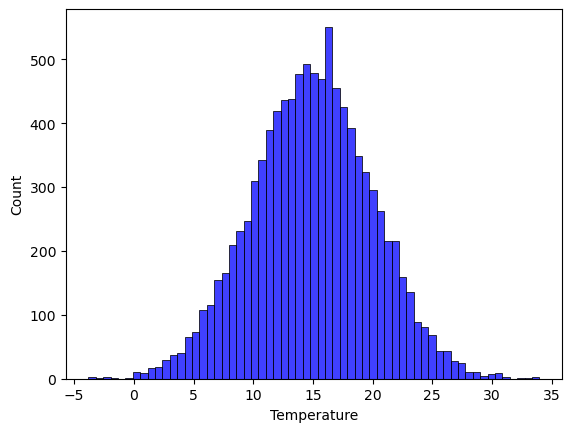

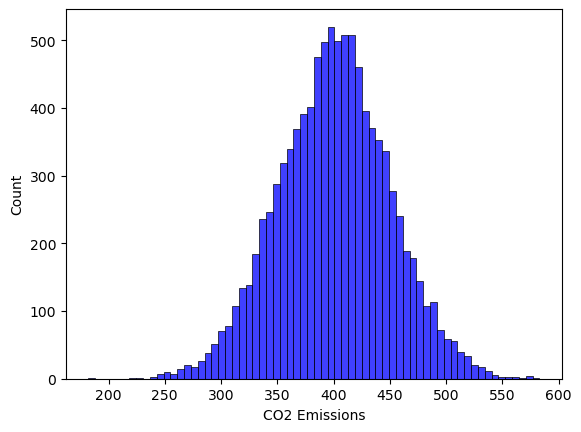

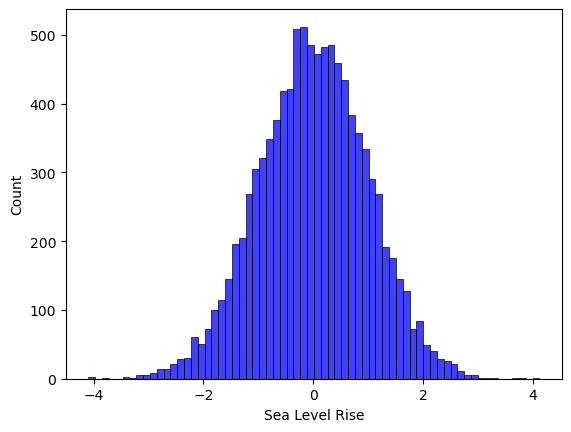

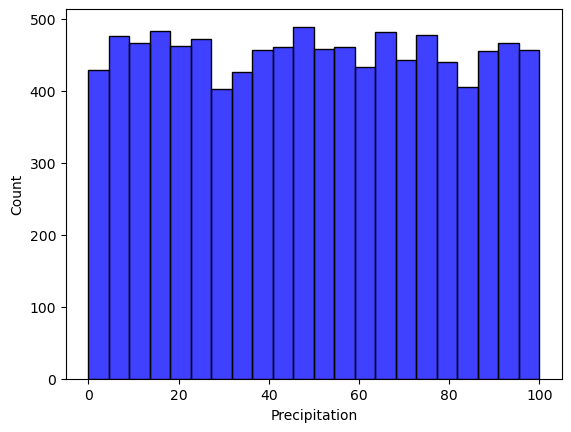

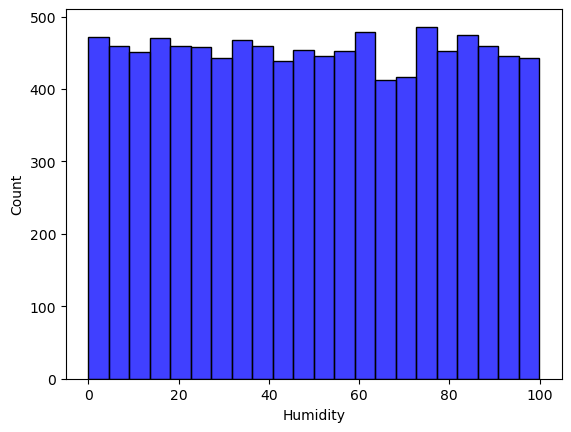

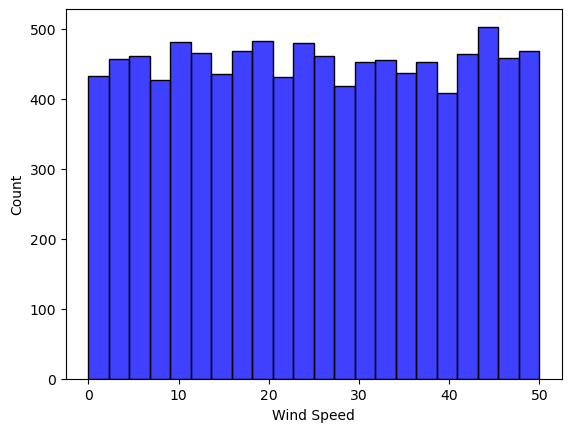

In [15]:
# histogram
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i, color="blue", ec="black")
    plt.show()

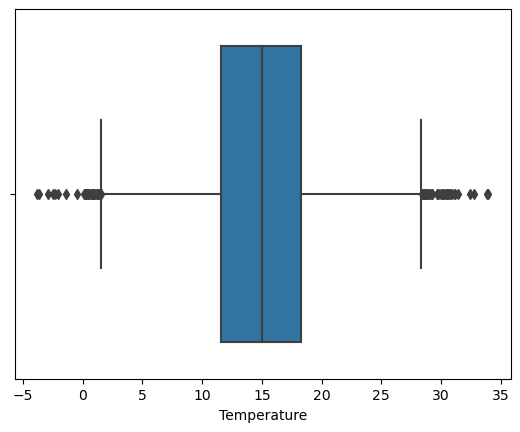

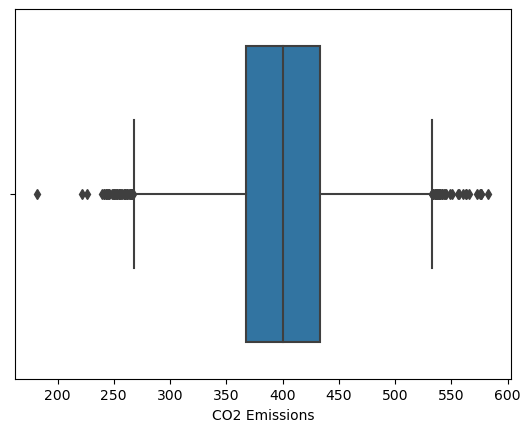

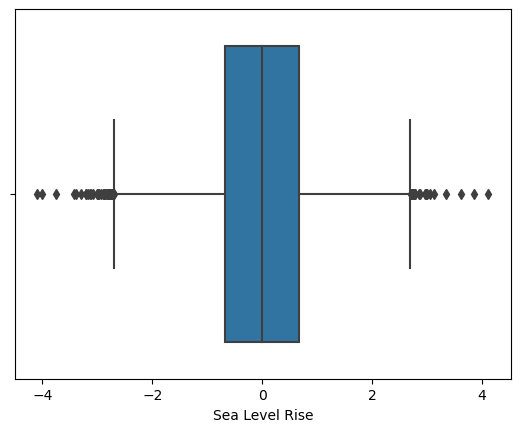

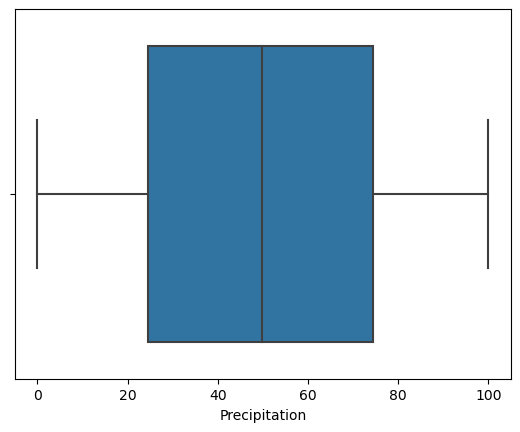

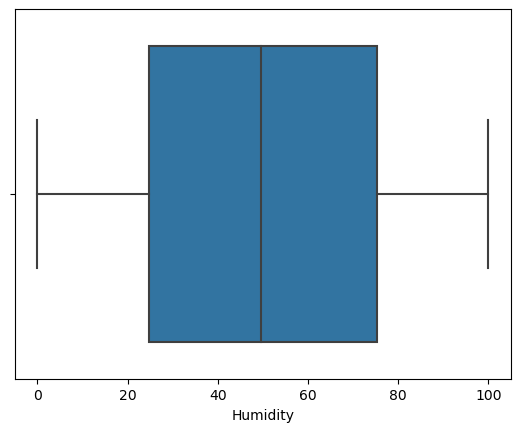

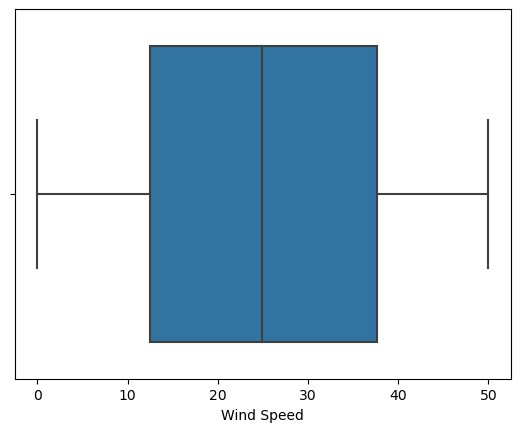

In [16]:
# box plot
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

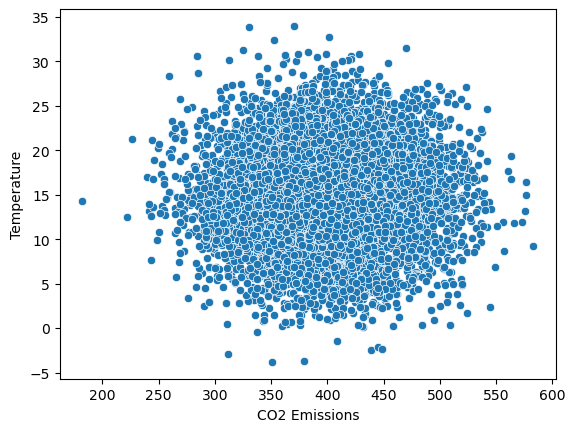

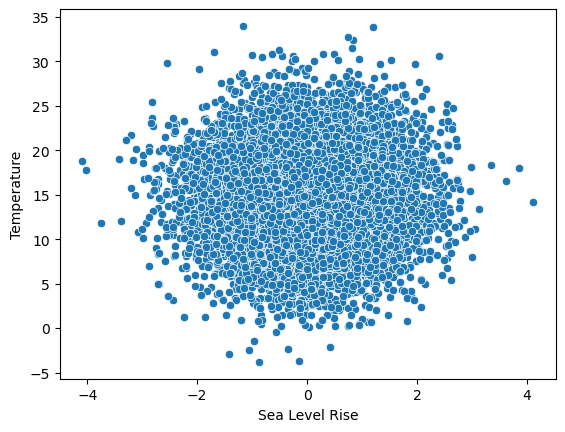

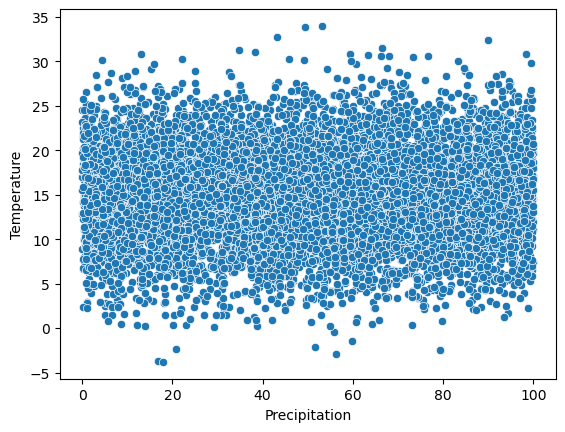

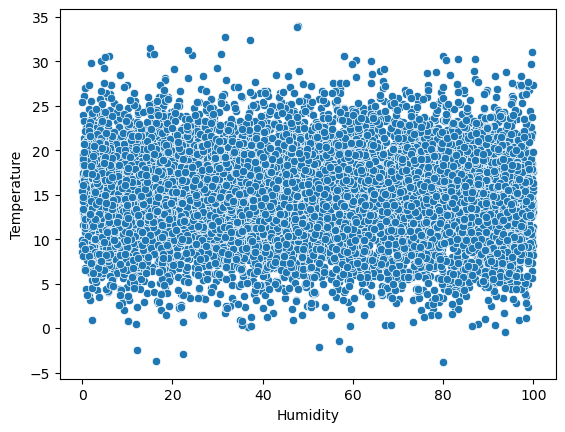

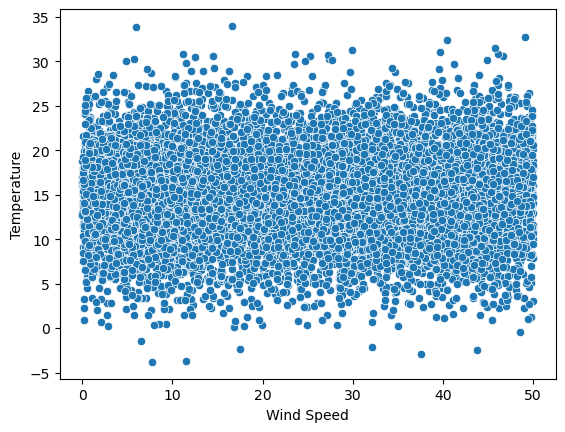

In [17]:
# scatter plot
for i in [
     'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']:
    sns.scatterplot(data=df,x=i,y="Temperature")
    plt.show()
      


In [18]:
# correlation 
df.select_dtypes(include="number").corr()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
Temperature,1.000000,-0.002775,0.011663,0.004916,-0.015737,0.021779
CO2 Emissions,-0.002775,1.000000,-0.004751,-0.007443,-0.003661,-0.003990
Sea Level Rise,0.011663,-0.004751,1.000000,-0.000249,-0.007610,0.011789
Precipitation,0.004916,-0.007443,-0.000249,1.000000,0.003732,-0.018798
Humidity,-0.015737,-0.003661,-0.007610,0.003732,1.000000,0.028591
Wind Speed,0.021779,-0.003990,0.011789,-0.018798,0.028591,1.000000


### simple linear regression of temperature and Co2 emissions 

In [19]:
import numpy as np
import statsmodels.api as sm

In [20]:
# let take temp. values to be y 
x=df.Temperature

In [21]:
x

0       10.688986
1       13.814430
2       27.323718
3       12.309581
4       13.210885
          ...    
9995    15.020523
9996    16.772451
9997    22.370025
9998    19.430853
9999    12.661928
Name: Temperature, Length: 10000, dtype: float64

In [22]:
# renaming varaibles names
df = df.rename(columns={'CO2 Emissions': 'CO2_Emissions'})
df


,Date,Location,Country,Temperature,CO2_Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


In [23]:
# replacing space with (_)
df.columns=df.columns.str.replace(" ","_")
df

,Date,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


In [24]:
# let us take Co2 Emission to be y
y=df.CO2_Emissions

In [25]:
y

0       403.118903
1       396.663499
2       451.553155
3       422.404983
4       410.472999
           ...    
9995    391.379537
9996    346.921190
9997    466.042136
9998    337.899776
9999    381.172746
Name: CO2_Emissions, Length: 10000, dtype: float64

In [26]:
# reshape data 
x=np.array(x).reshape(-1,1)
x

array([[10.68898596],
       [13.81443029],
       [27.32371776],
       ...,
       [22.3700246 ],
       [19.43085333],
       [12.66192784]])

In [27]:
y=np.array(y).reshape(-1,1)

In [28]:
y

array([[403.11890253],
       [396.66349929],
       [451.55315505],
       ...,
       [466.04213566],
       [337.89977579],
       [381.17274644]])

In [29]:
# importing linear regression from sklearn
from sklearn.linear_model import LinearRegression 

In [30]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

In [31]:
# Fit the model to the data
lr.fit(x,y)


LinearRegression()

In [32]:
# to get intercept of the model
c=lr.intercept_
c

array([400.62996119])

In [33]:
# to get gradient of the model
m=lr.coef_
m

array([[-0.0274164]])

### Times Series Forcasting ARIMA - Wind speed Forecastong

In [34]:
import warnings 
import itertools

In [35]:
df1=df[['Date','Wind_Speed']]
df1

,Date,Wind_Speed
0,2000-01-01 00:00:00.000000000,18.492026
1,2000-01-01 20:09:43.258325832,34.249300
2,2000-01-02 16:19:26.516651665,34.124261
3,2000-01-03 12:29:09.774977497,8.554563
4,2000-01-04 08:38:53.033303330,8.001164
...,...,...
9995,2022-12-27 15:21:06.966696576,6.531866
9996,2022-12-28 11:30:50.225022464,42.249014
9997,2022-12-29 07:40:33.483348224,18.293708
9998,2022-12-30 03:50:16.741674112,42.424255


In [36]:
#head
df1.head()

,Date,Wind_Speed
0,2000-01-01 00:00:00.000000000,18.492026
1,2000-01-01 20:09:43.258325832,34.249300
2,2000-01-02 16:19:26.516651665,34.124261
3,2000-01-03 12:29:09.774977497,8.554563
4,2000-01-04 08:38:53.033303330,8.001164


In [37]:
# tail
df1.tail()

,Date,Wind_Speed
9995,2022-12-27 15:21:06.966696576,6.531866
9996,2022-12-28 11:30:50.225022464,42.249014
9997,2022-12-29 07:40:33.483348224,18.293708
9998,2022-12-30 03:50:16.741674112,42.424255
9999,2022-12-31 00:00:00.000000000,41.856539


In [38]:
# columns
df1.columns

Index(['Date', 'Wind_Speed'], dtype='object')

In [39]:
#shape
df1.shape

(10000, 2)

In [40]:
# colimn datatpes
df1.dtypes

Date           object
Wind_Speed    float64
dtype: object

In [41]:
# missing values 
df1.isnull().sum()

Date          0
Wind_Speed    0
dtype: int64

In [42]:
# duplicates 
df1.duplicated().sum()

0

In [43]:
# cinverting date to datatime formta
df1['Date']=pd.to_datetime(df1['Date'])
df1

,Date,Wind_Speed
0,2000-01-01 00:00:00.000000000,18.492026
1,2000-01-01 20:09:43.258325832,34.249300
2,2000-01-02 16:19:26.516651665,34.124261
3,2000-01-03 12:29:09.774977497,8.554563
4,2000-01-04 08:38:53.033303330,8.001164
...,...,...
9995,2022-12-27 15:21:06.966696576,6.531866
9996,2022-12-28 11:30:50.225022464,42.249014
9997,2022-12-29 07:40:33.483348224,18.293708
9998,2022-12-30 03:50:16.741674112,42.424255


In [44]:
df1.dtypes

Date          datetime64[ns]
Wind_Speed           float64
dtype: object

In [45]:
# seting date columns as index
df1.set_index('Date', inplace=True)

In [46]:
df1

,Wind_Speed
Date,
2000-01-01 00:00:00.000000000,18.492026
2000-01-01 20:09:43.258325832,34.249300
2000-01-02 16:19:26.516651665,34.124261
2000-01-03 12:29:09.774977497,8.554563
2000-01-04 08:38:53.033303330,8.001164
...,...
2022-12-27 15:21:06.966696576,6.531866
2022-12-28 11:30:50.225022464,42.249014
2022-12-29 07:40:33.483348224,18.293708


## Date visualization 

In [47]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [48]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [49]:
# parameter of ARIMA
p=d=q=range(0,2)
# generating different combaniation of p,d,q
pdq=list(itertools.product(p,d,q))
pdq


[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]